# Линейный SVM "своими руками"

## Генерируем обучающую и тестовую выборку для экспериментов

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_classification(
    n_samples=10000, n_features=20, 
    n_classes=2, n_informative=20, 
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

print(len(X), len(y))
print(len(X_train))

10000 10000
8000


## Пишем свой класс для SVM

In [5]:
import numpy as np
from random import randint
import random


np.random.seed(42)
random.seed(42)


class MySVM(object):
    def __init__(self, C=10000):
        self.C = C # regularization constant
        self.story = []

    # f(x) = <w,x> + w_0
    def f(self, x):
        return np.dot(self.w, x) + self.w0

    # a(x) = [f(x) > 0]
    def a(self, x):
        return 1 if self.f(x) > 0 else 0
    
    # predicting answers for X_test
    def predict(self, X_test):
        return np.array([self.a(x) for x in X_test])

    # l2-regularizator
    def reg(self):
        return 1.0 * sum(self.w ** 2) / (2.0 * self.C)

    # l2-regularizator derivative
    def der_reg(self):
        return self.w / self.C

    # hinge loss
    def loss(self, x, answer):
        return max([0, 1 - answer * self.f(x)])
    
    def margin(self, x, answer):
        return 1 - answer * self.f(x)

    # hinge loss derivative
    def der_loss(self, x, answer):
        if self.margin(x, answer) > 0:
            der_w0 = - answer 
            der_w = - answer * x 
            return der_w, der_w0
        else:
            return np.zeros_like(x), 0

#     fitting w and w_0 with SGD
    def fit(self, X_train, y_train):
        np.random.seed(1)
        random.seed(1)
        dim = len(X_train[0])
        self.w = np.random.rand(dim) # initial value for w
        self.w0 = np.random.randn() # initial value for w_0
        
        # 10000 steps is OK for this example
        # another variant is to continue iterations while error is still decreasing
        for k in range(10000):  
            # random example choise
            random.seed(10)
            np.random.seed(10)
            rand_index = randint(0, len(X_train) - 1) # generating random index
            x = X_train[rand_index]
            y = y_train[rand_index]

            # simple heuristic for step size
            step = 0.5 * 0.9 ** k
            
            der_w, der_w0 = self.der_loss(x, y)
            der_w += self.der_reg()

            # w update
            self.w -= step * der_w
            # w_0 update
            self.w0 -= step * der_w0
            self.story.append(self.w[10])

## Пробуем обучить наш классификатор и посмотреть на качество на тесте

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report

In [17]:
model = MySVM(C = 1000)
model.fit(X_train, y_train)

In [18]:
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.57      0.51      0.54      3997
          1       0.56      0.62      0.59      4003

avg / total       0.56      0.56      0.56      8000



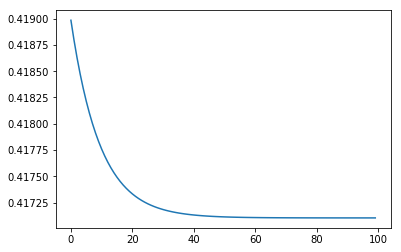

In [12]:
# Посмотрим на то, как сходилась одна из компонент вектора w
plt.plot(model.story[:100]);

## sklearn.svm.SVC

In [148]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1)
svc.fit(X_train, y_train);
print(svc.coef_, svc.intercept_)

[[-0.03752277 -0.0560032   0.00281033  0.05088451  0.022768    0.1120233
  -0.00025779  0.04120328 -0.06110078 -0.06086853  0.0559479   0.067025
   0.10627085  0.04397122 -0.10173862  0.02535486  0.06453497  0.07757493
  -0.00552572  0.08761565]] [-0.02190368]


In [149]:
print(classification_report(y_train, svc.predict(X_train)))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80      3997
          1       0.80      0.80      0.80      4003

avg / total       0.80      0.80      0.80      8000

